<a href="https://colab.research.google.com/github/Dp4150/Machine-Learning/blob/main/EXP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
x = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [ ]:
# Extract specific columns
x_value = x[['name']]  # Use double brackets to select a single column and keep it as a DataFrame
y_value = y[['role']]

# Print extracted values
print(x_value)
print(y_value)

KeyError: "None of [Index(['name'], dtype='object')] are in the [columns]"

In [ ]:
print(x.columns)
print(y.columns)


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Index(['quality'], dtype='object')


In [ ]:
# Extract specific columns
x_value = x[['fixed_acidity']]  # Use double brackets to select a single column and keep it as a DataFrame
y_value = y[['quality']]

# Print extracted values
print(x_value)
print(y_value)

      fixed_acidity
0               7.4
1               7.8
2               7.8
3              11.2
4               7.4
...             ...
6492            6.2
6493            6.6
6494            6.5
6495            5.5
6496            6.0

[6497 rows x 1 columns]
      quality
0           5
1           5
2           5
3           6
4           5
...       ...
6492        6
6493        5
6494        6
6495        7
6496        6

[6497 rows x 1 columns]


<Axes: >

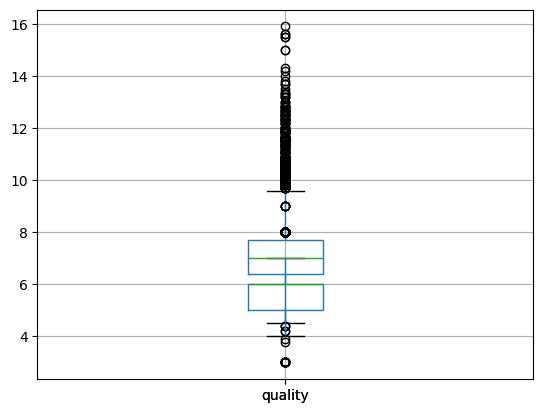

In [ ]:
x_value.boxplot(column=['fixed_acidity'])
y_value.boxplot(column=['quality'])

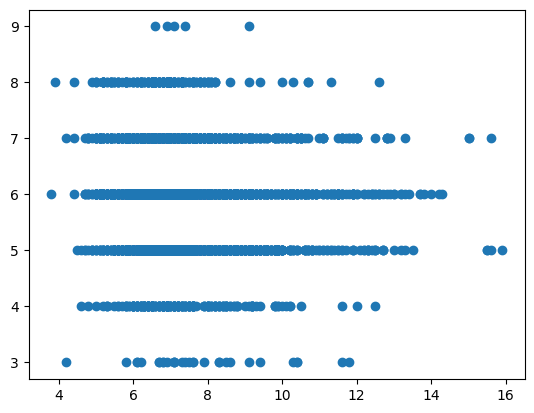

In [ ]:
plt.scatter(x_value,y_value)

In [ ]:
x_value.isnull().sum()
y_value.isnull().sum()

,0
quality,0


In [ ]:
x_feature= x[['fixed_acidity']]
y_feature= y[['quality']]

In [ ]:
#ml model
def hypothesis(theta_array,x):
  return theta_array[0]+theta_array[1]*x

In [ ]:
def costfunction(theta_array,x,y,m):
  total_cost=0
  for i in range(m):
    total_cost+=(((theta_array[0]+theta_array[1]*x[i])-y[i])**2)
  return total_cost/(2*m)

In [ ]:
def gradient_descent(theta_array,x,y,m,alpha):
  summation_0=0
  summation_1=0
  for i in range(m):
      summation_0+=((theta_array[0]+theta_array[1]*x[i])-y[i])
      summation_1+=(((theta_array[0]+theta_array[1]*x[i])-y[i])*x[i])

  new_theta0=theta_array[0]-(summation_0*alpha/m)
  new_theta1=theta_array[1]-(summation_1*alpha/m)
  improvised_theta=[new_theta0,new_theta1]
  #print(improvised_theta)
  return improvised_theta

In [ ]:
def training(x,y,alpha,epochs):
  theta_0=0
  theta_1=0
  m=x.size
  cost_values=[]
  theta_array=[theta_0,theta_1]
  for i in range(epochs):
    theta_array=gradient_descent(theta_array,x,y,m,alpha)
    loss=costfunction(theta_array,x,y,m)
    cost_values.append(loss)
    y_new=theta_array[0]+theta_array[1]*x
    plt.scatter(x,y)
    plt.plot(x,y_new,'r')
    plt.show()

  x=np.arange(0,epochs)
  plt.plot(x,cost_values)
  plt.show()
  return theta_array

In [ ]:
x_feature= x_feature.values.reshape(x_feature.size)
y_feature= y_feature.values.reshape(y_feature.size)

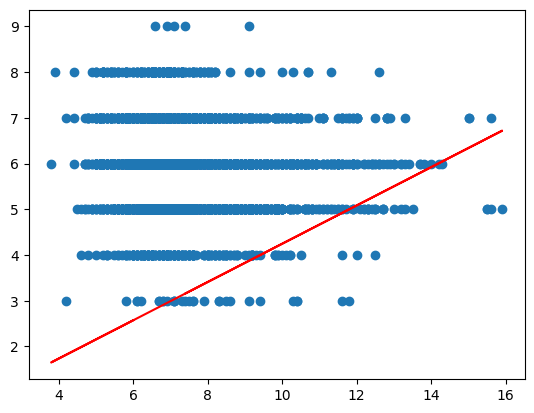

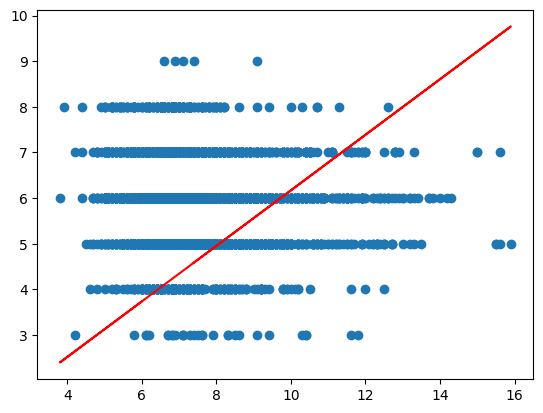

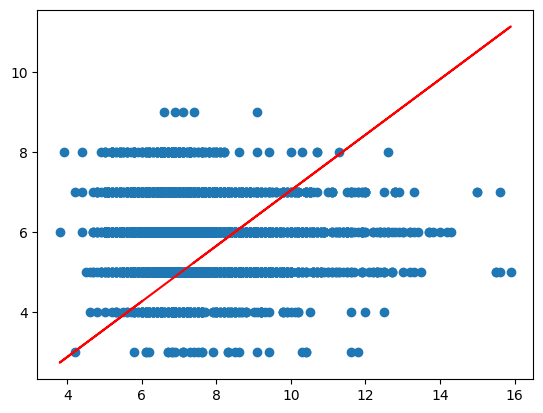

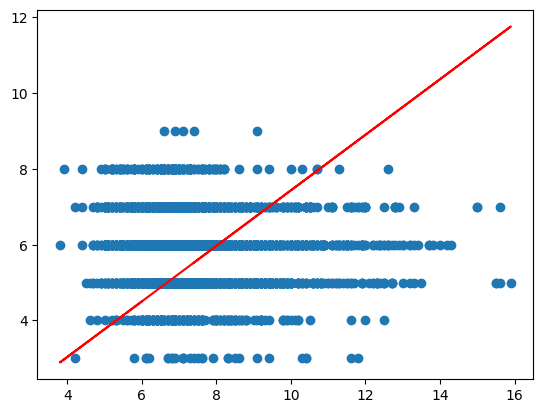

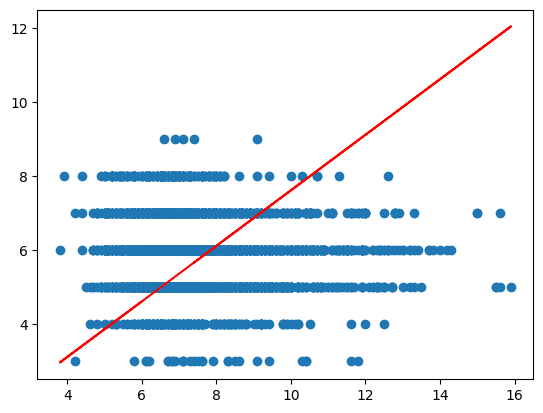

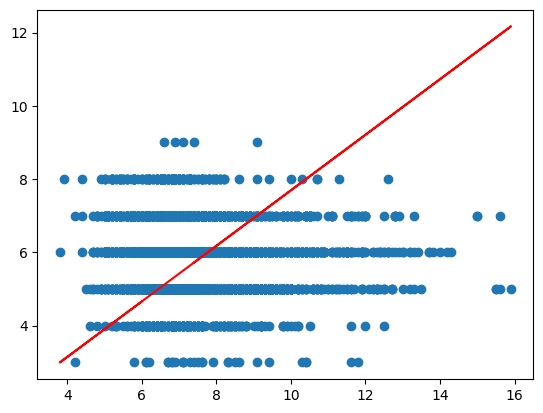

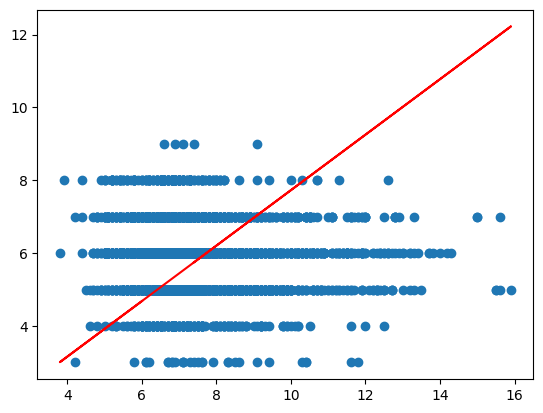

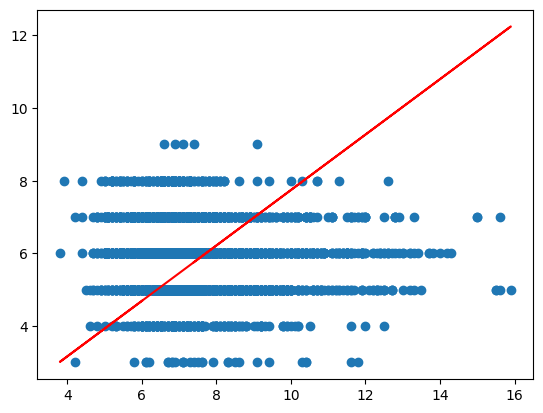

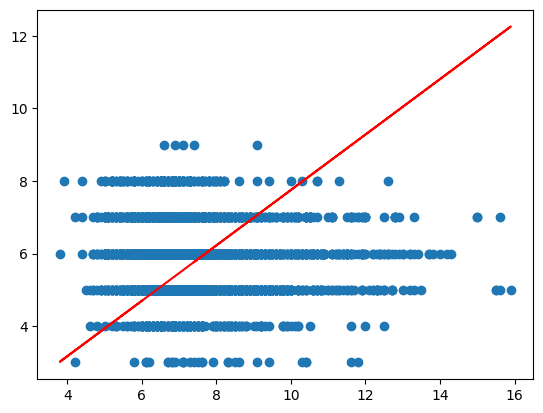

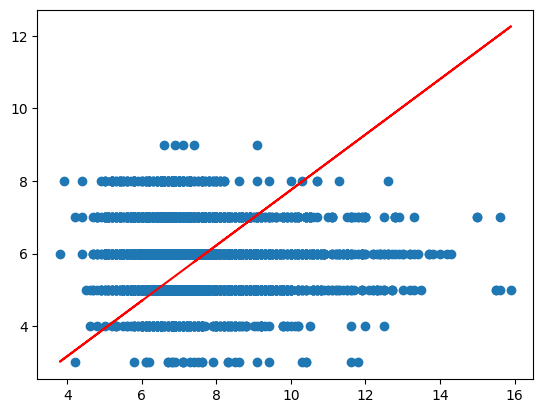

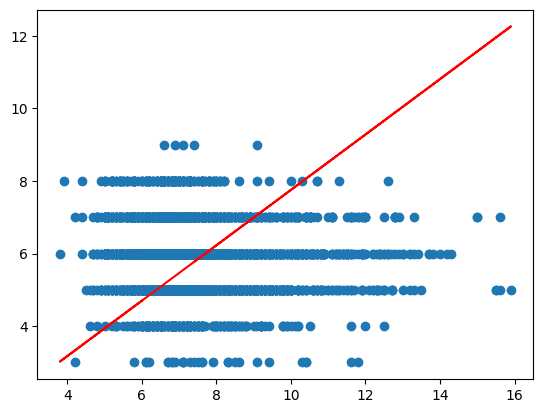

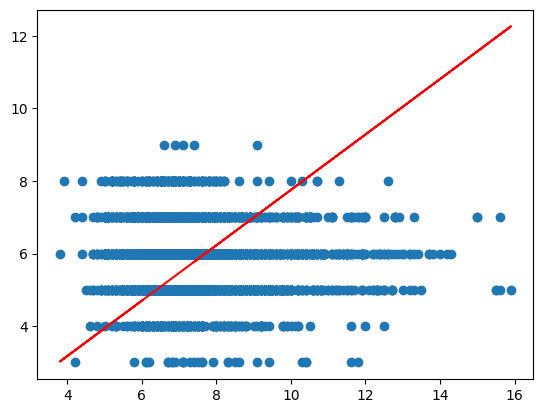

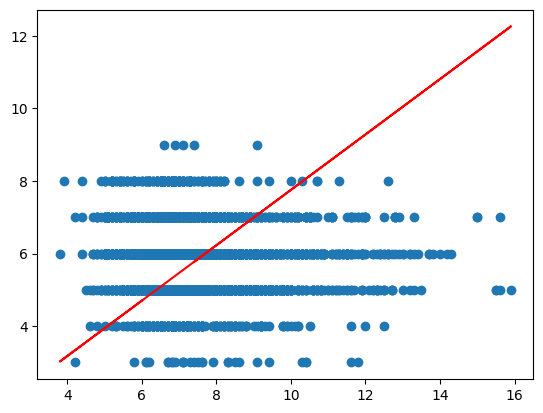

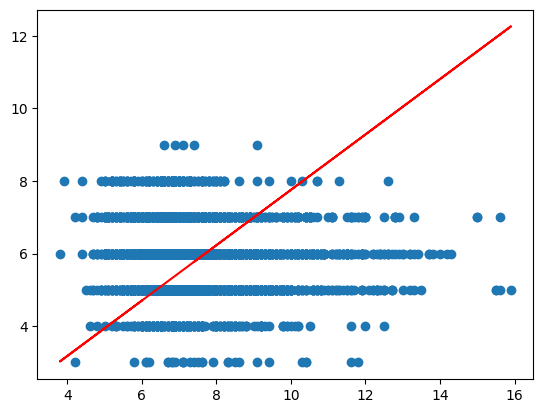

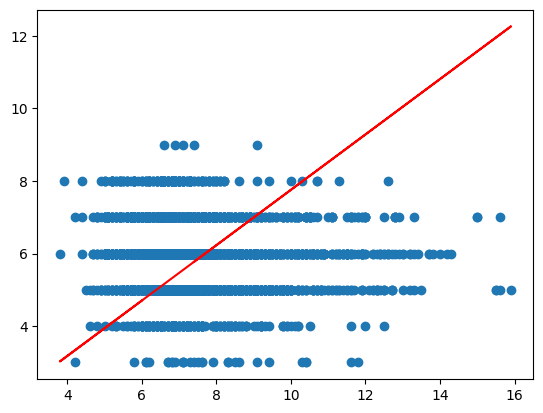

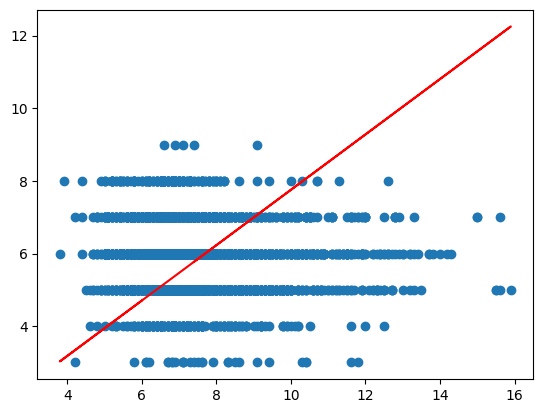

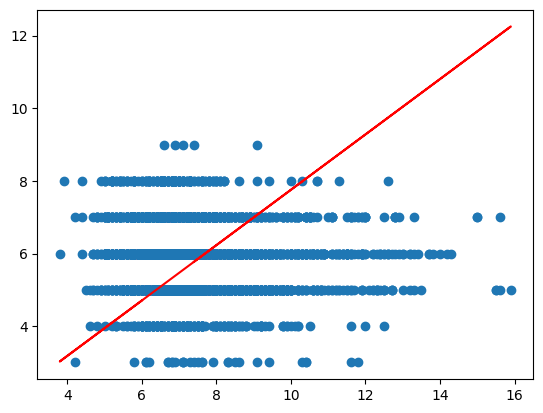

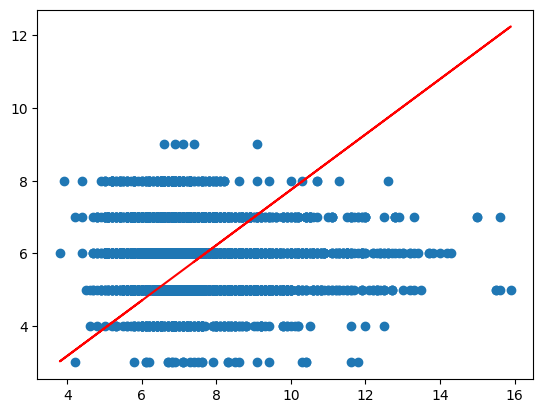

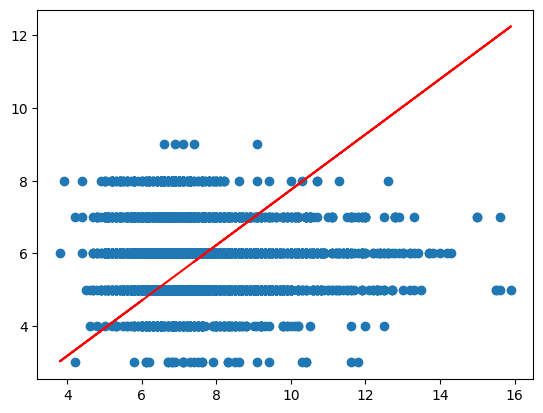

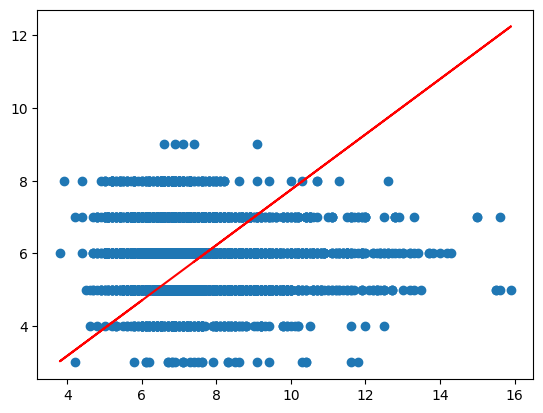

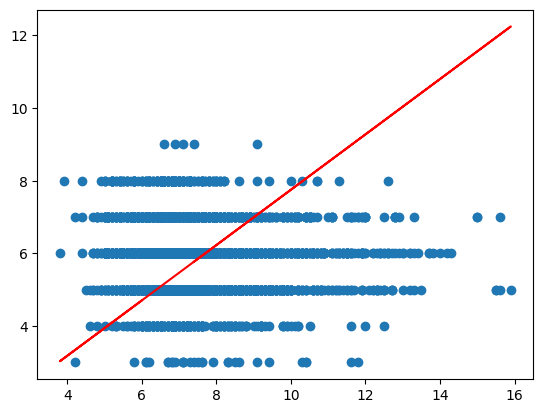

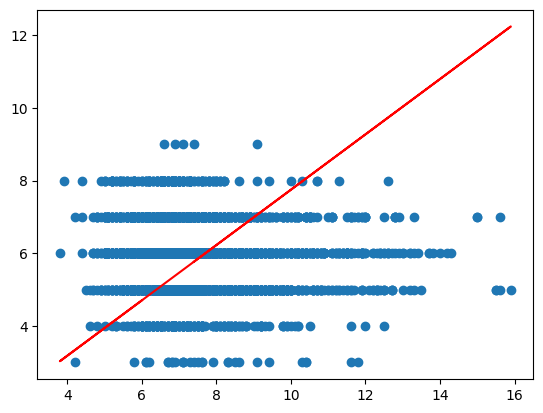

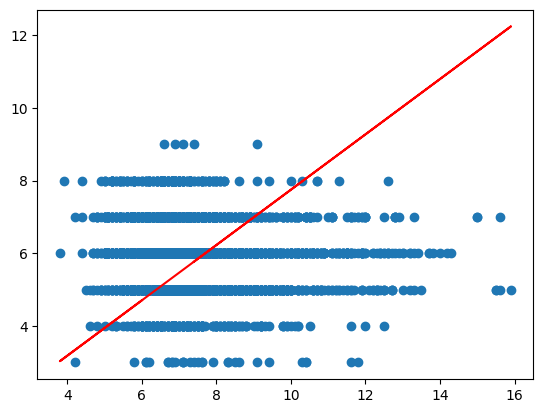

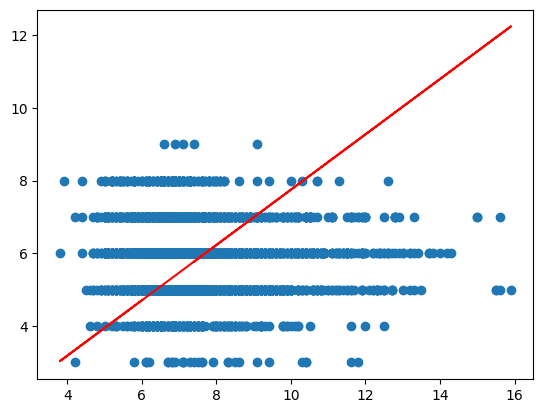

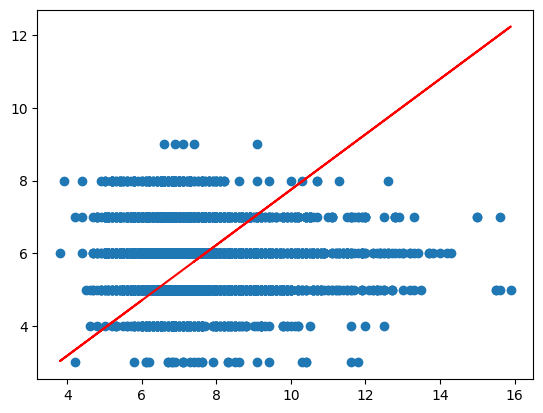

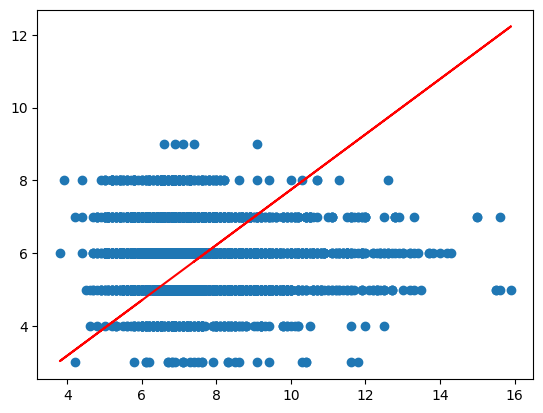

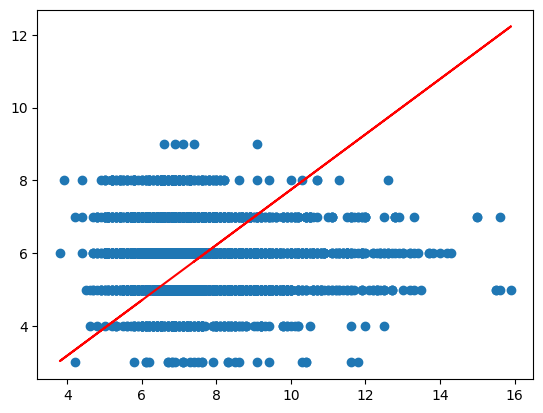

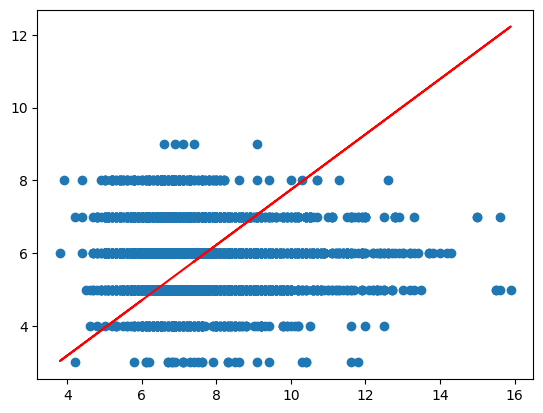

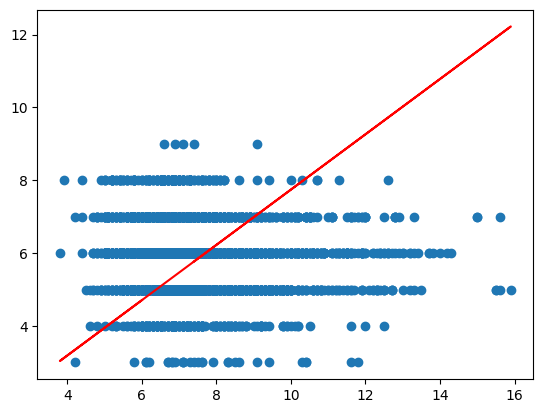

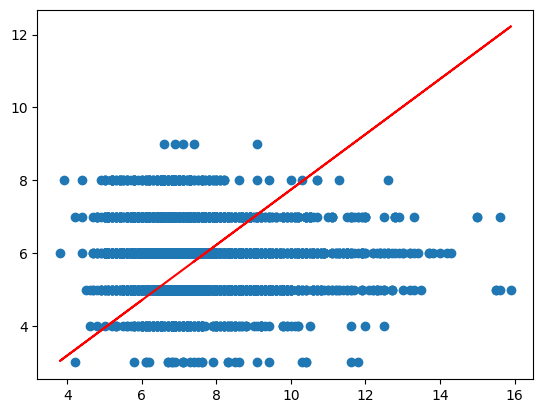

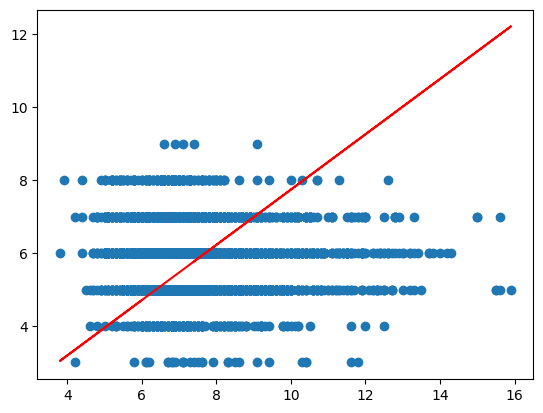

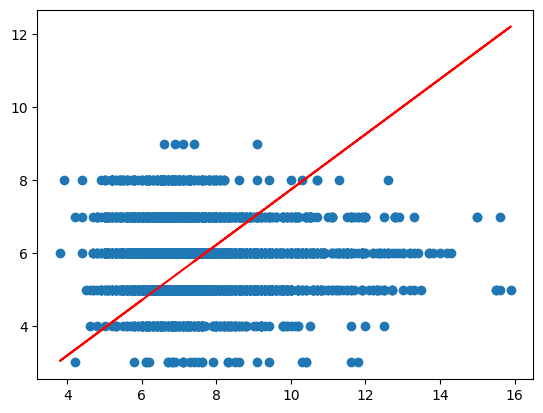

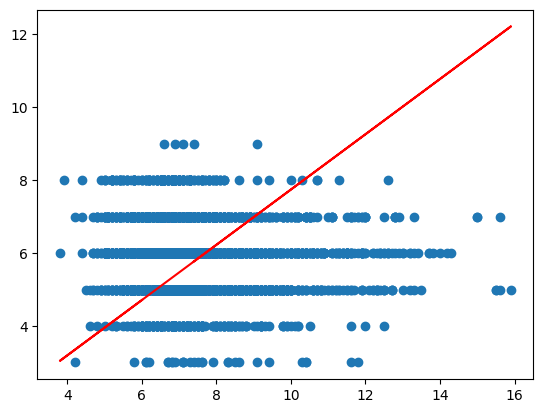

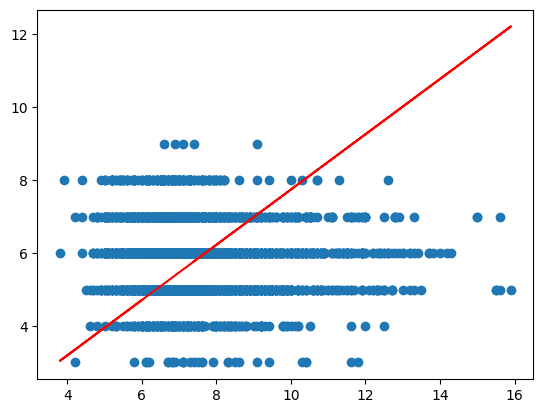

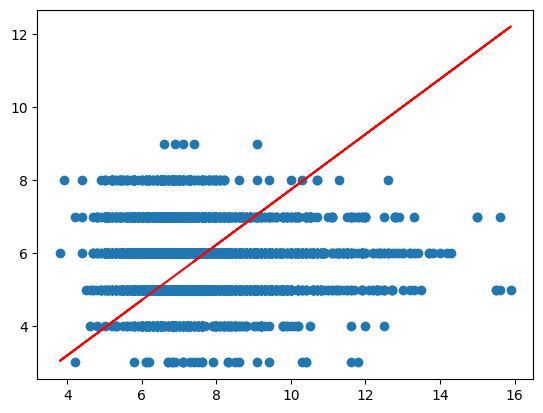

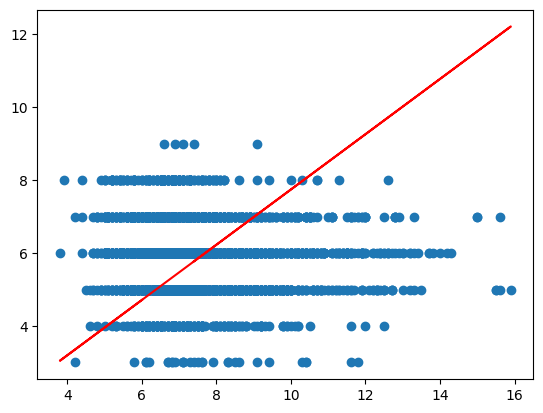

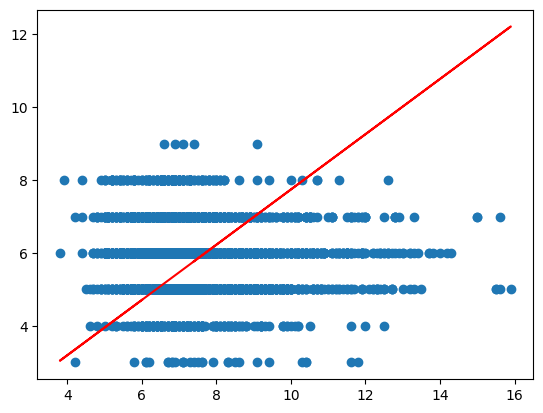

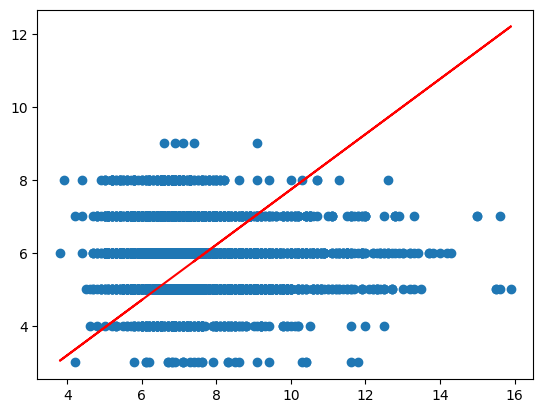

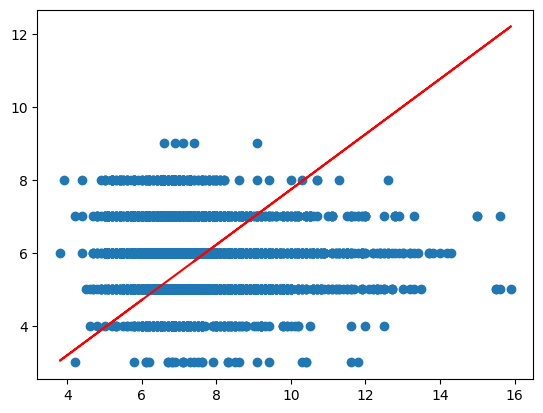

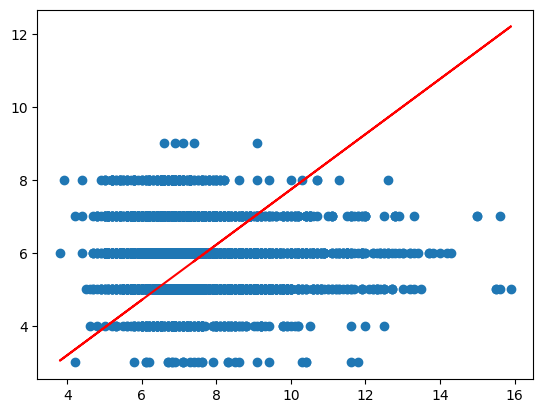

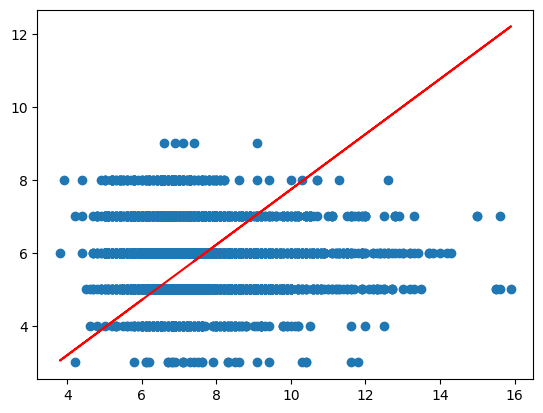

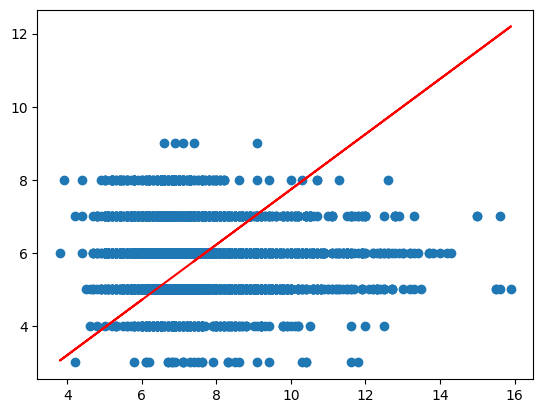

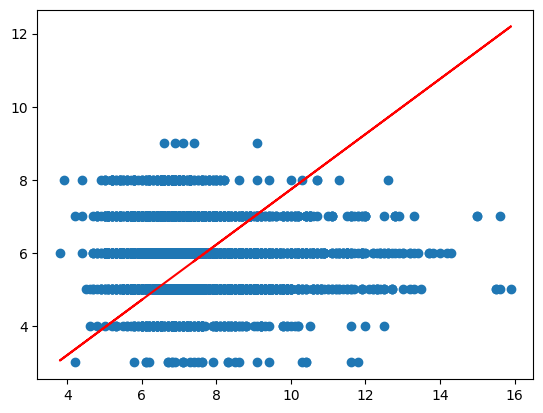

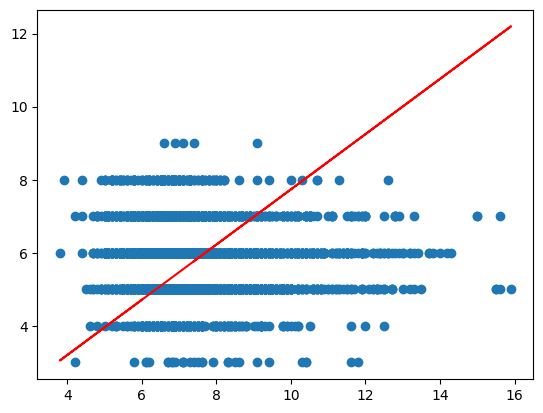

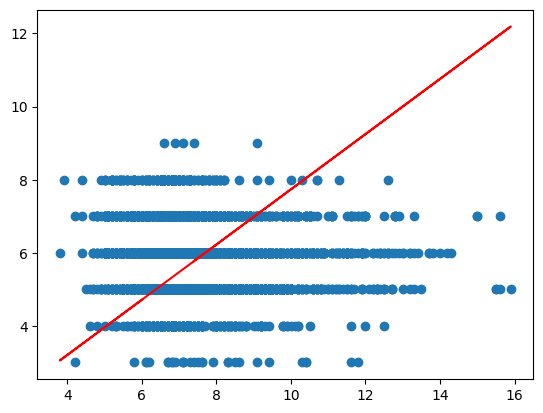

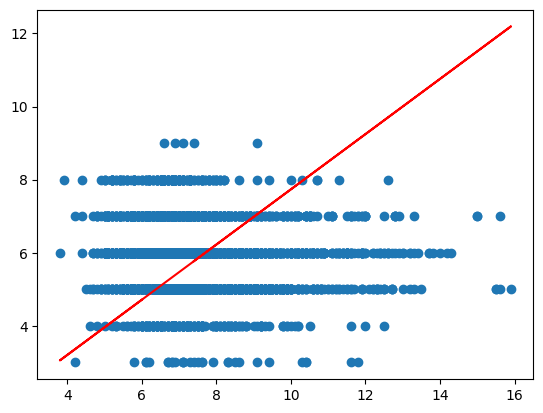

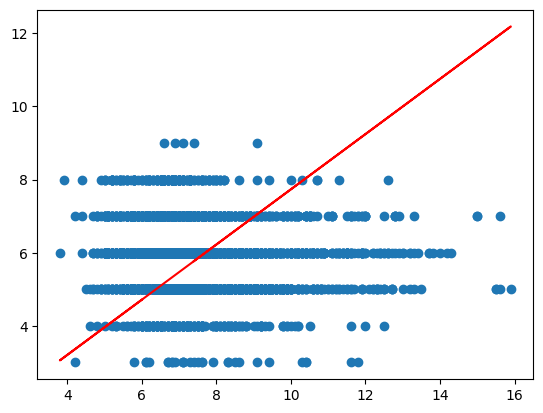

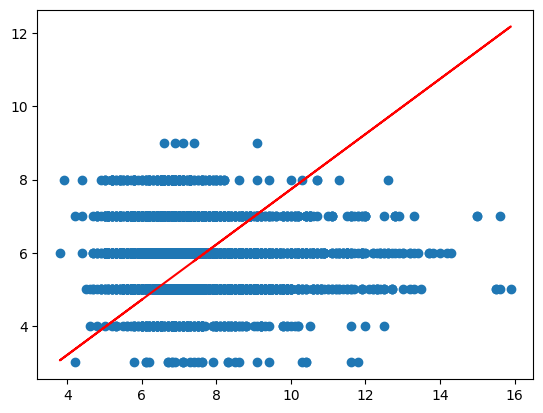

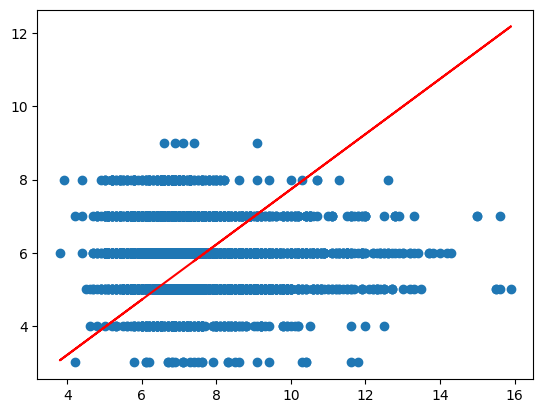

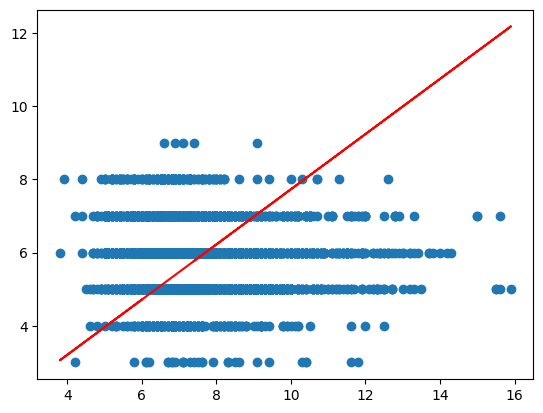

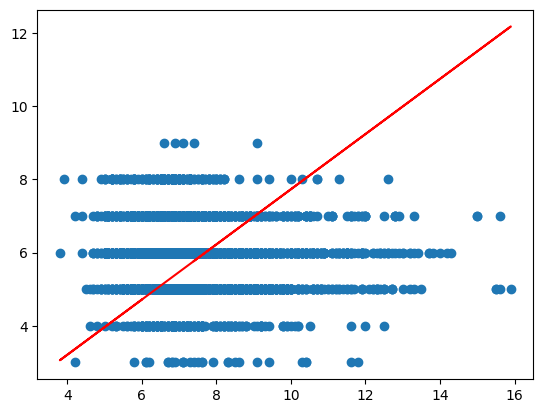

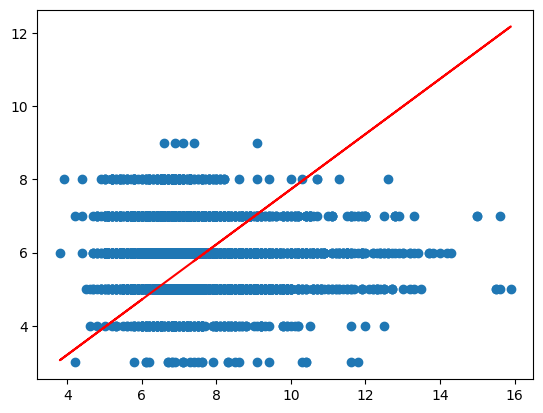

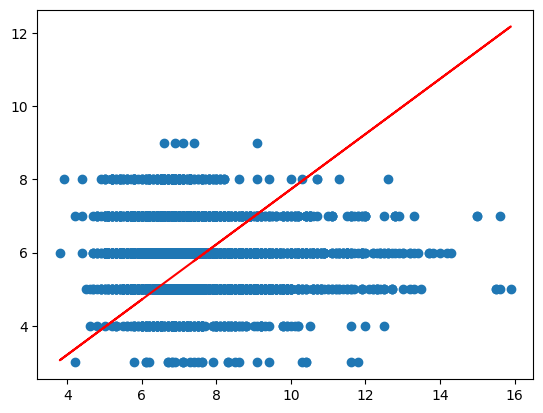

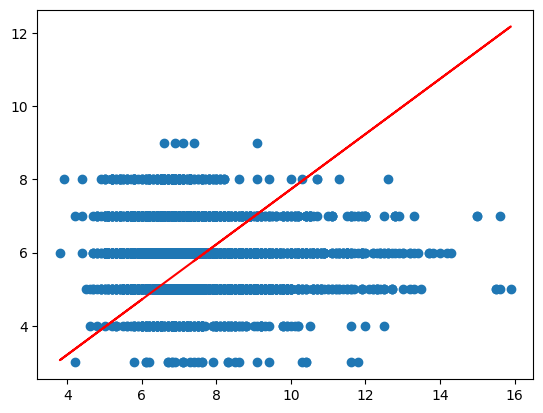

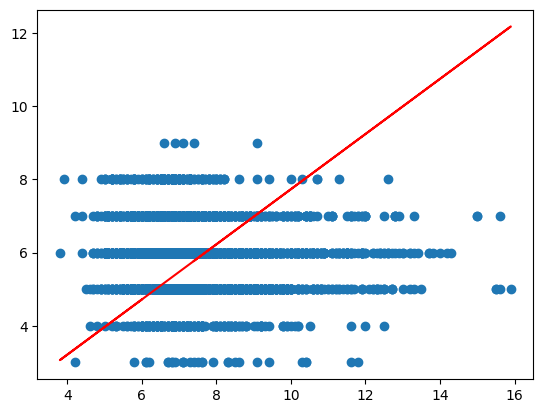

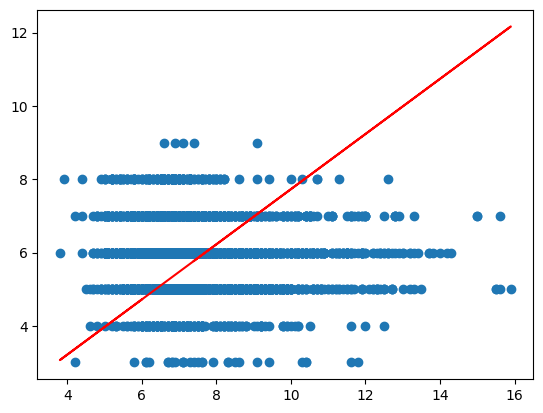

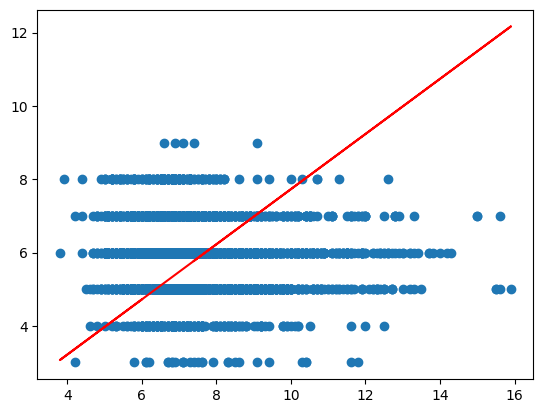

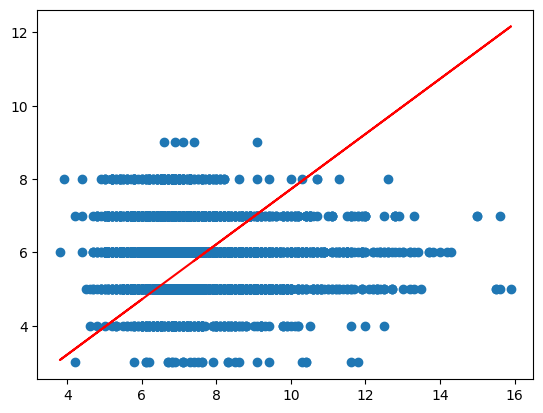

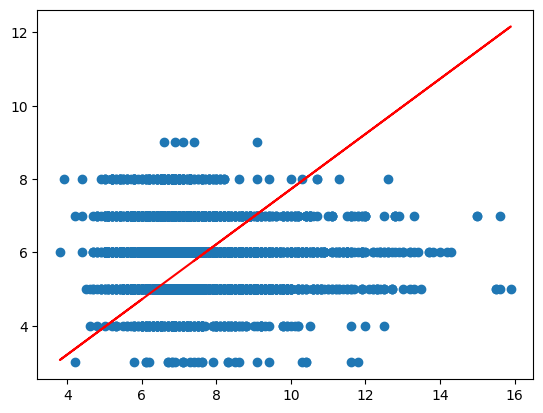

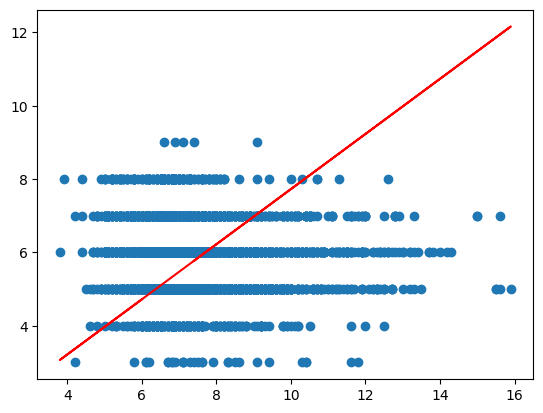

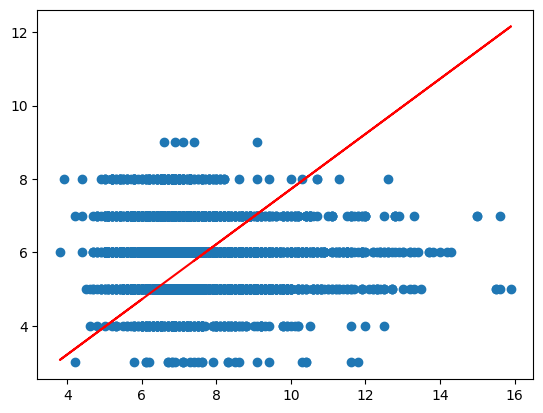

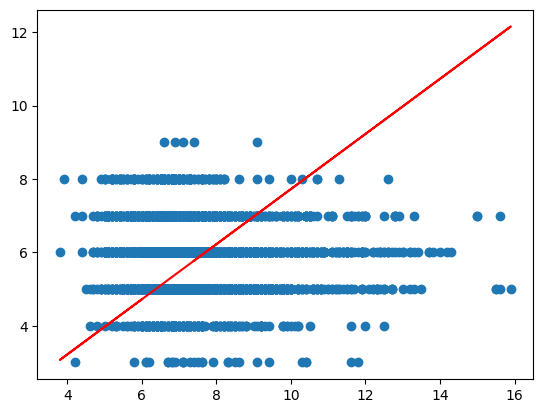

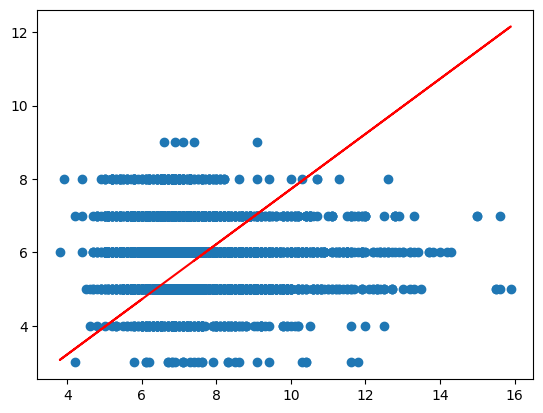

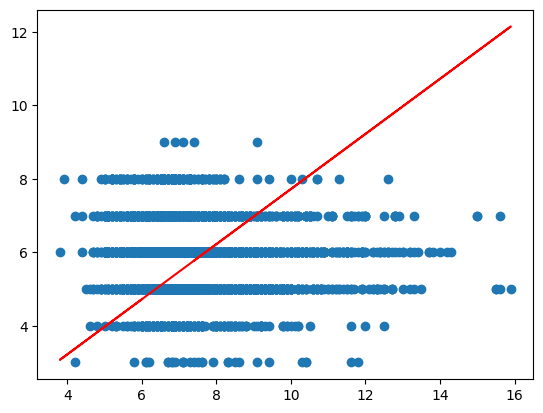

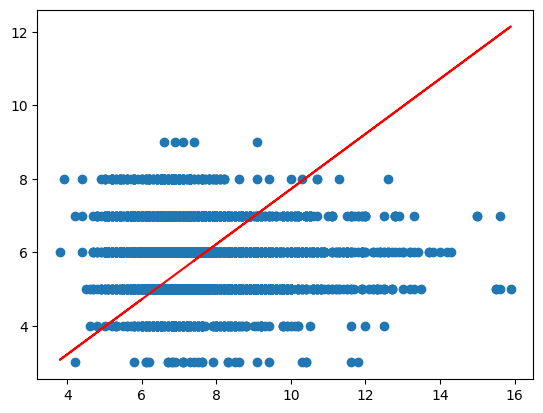

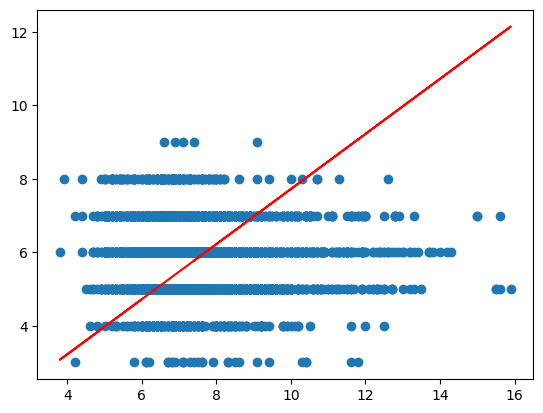

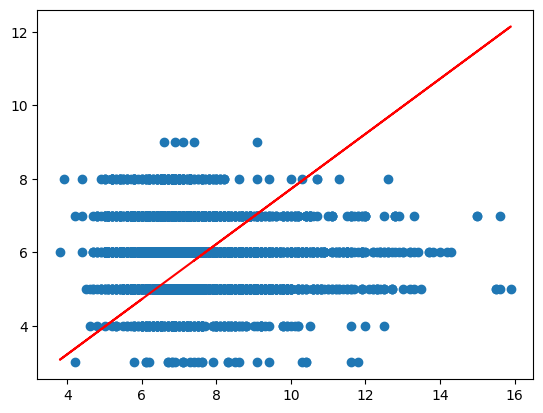

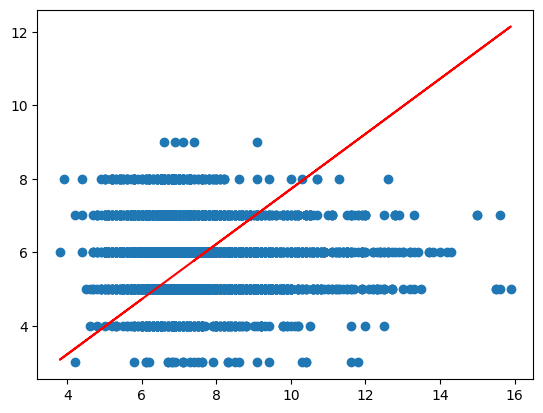

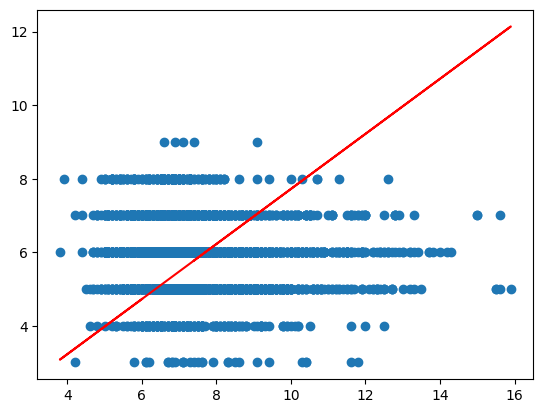

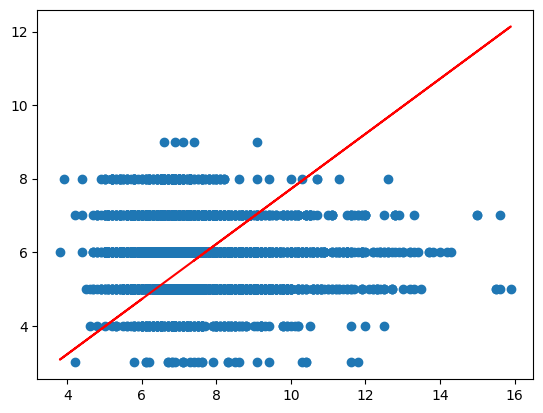

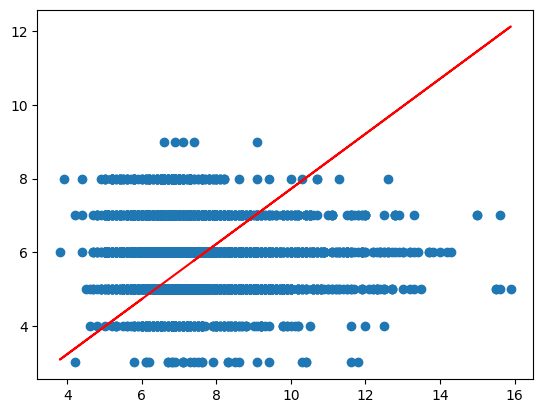

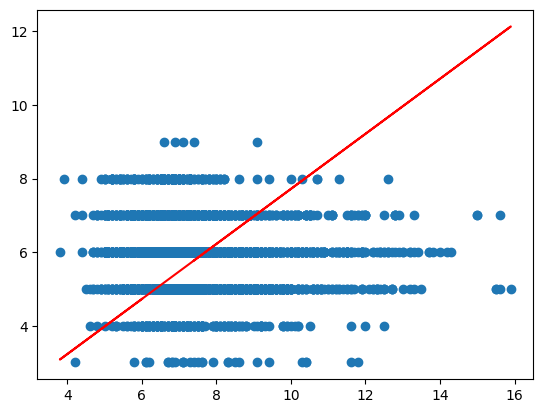

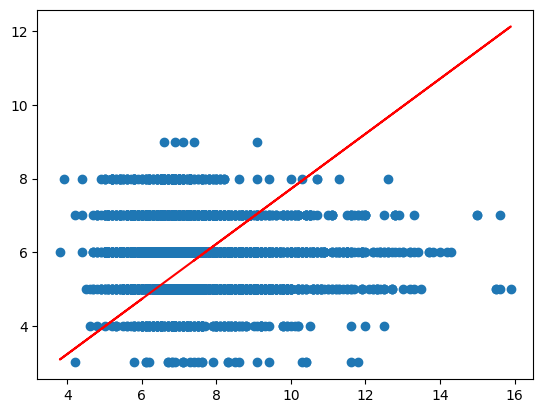

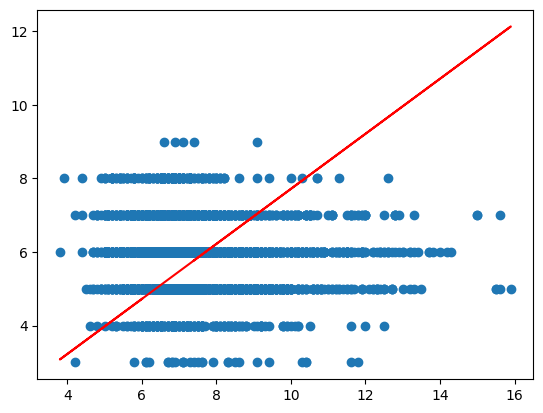

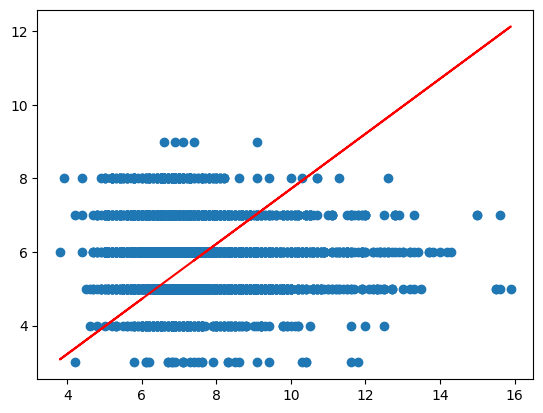

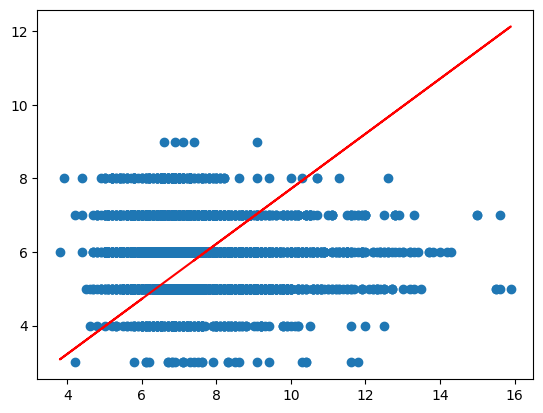

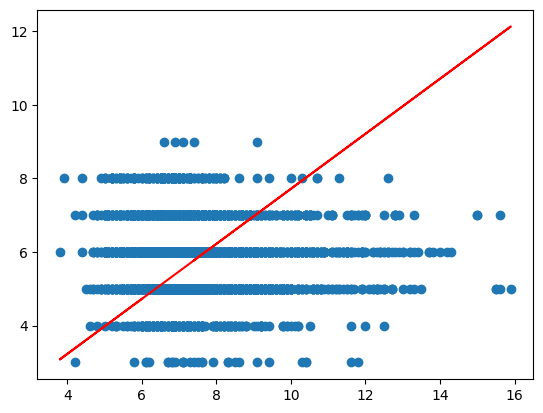

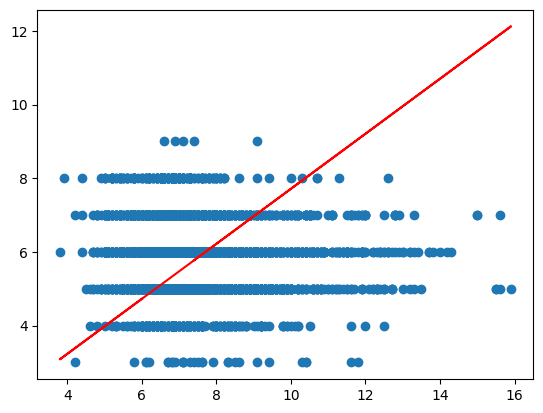

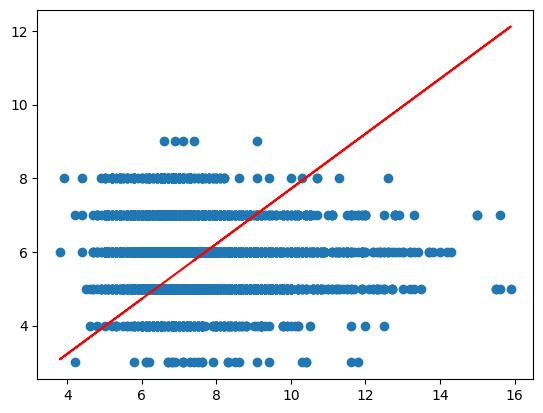

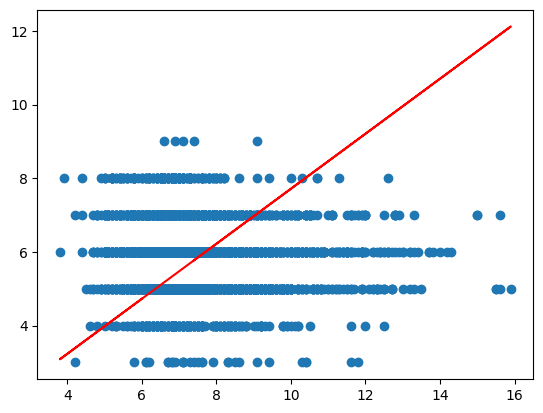

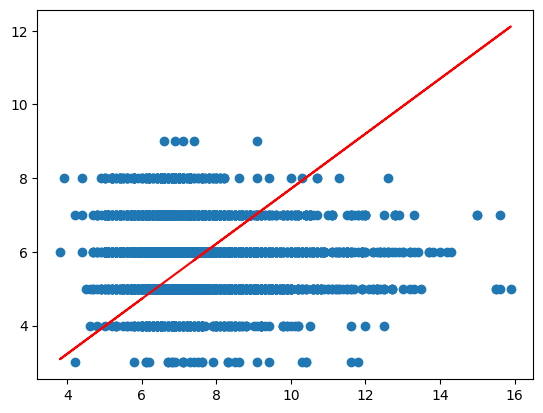

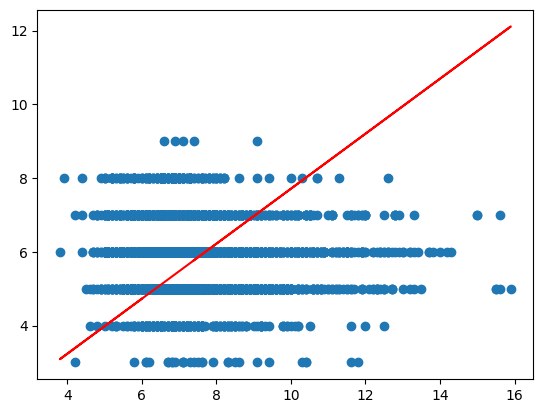

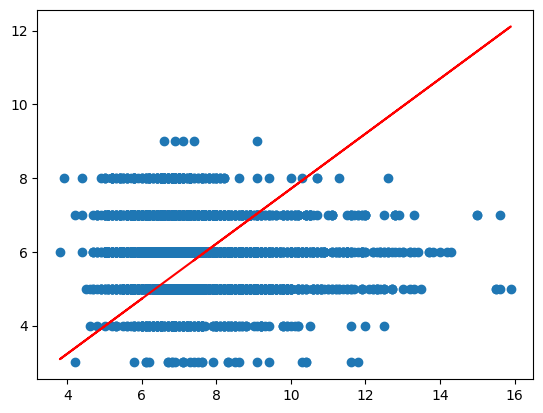

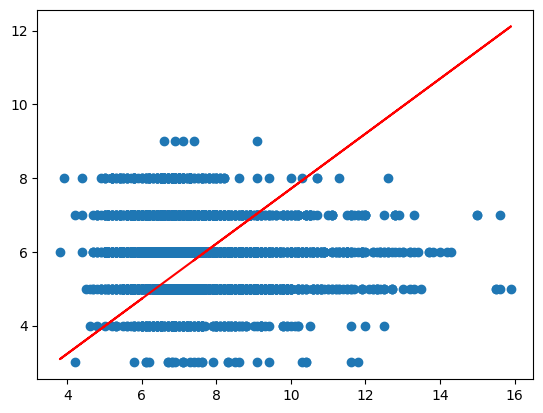

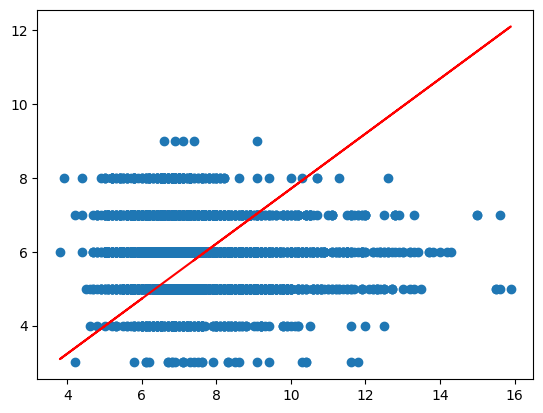

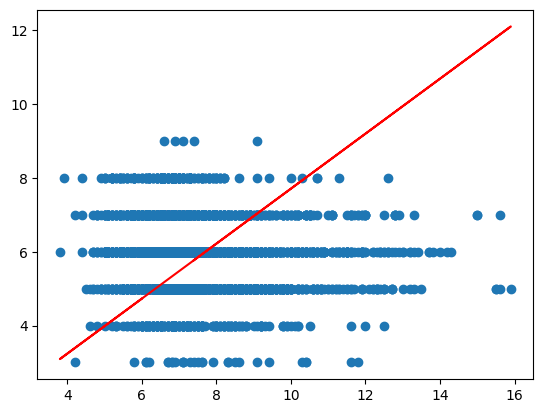

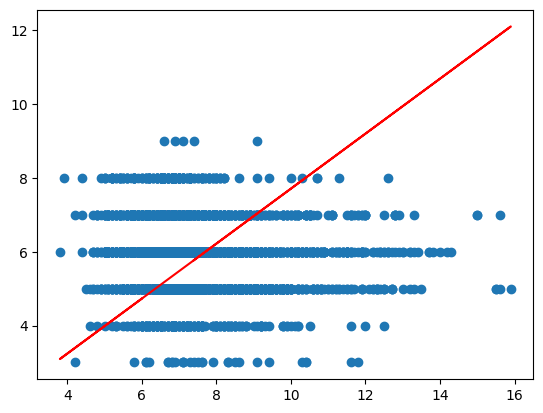

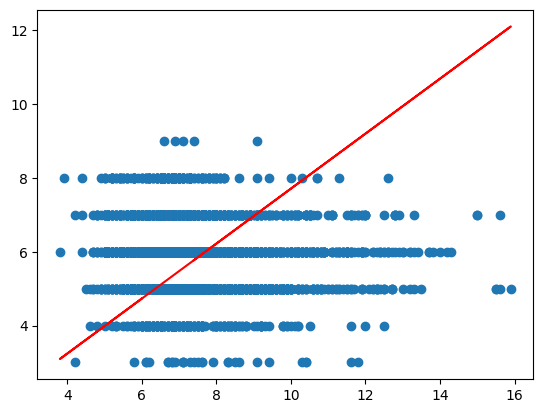

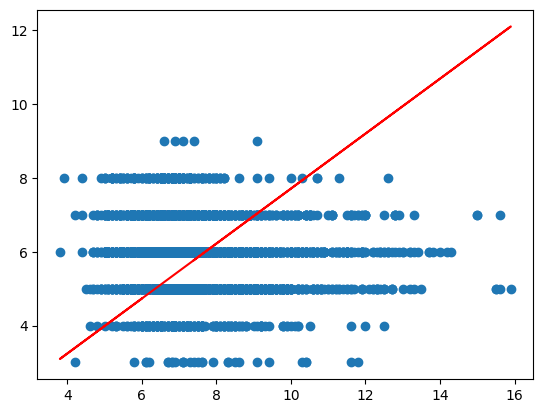

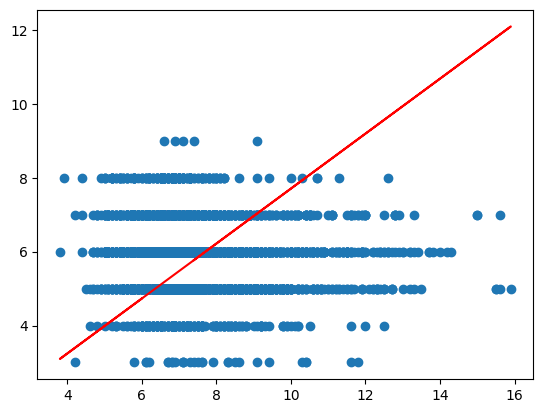

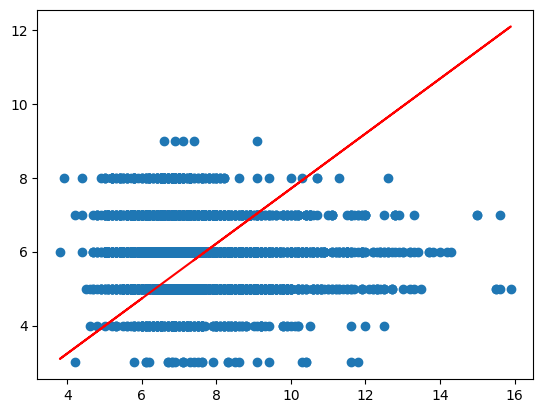

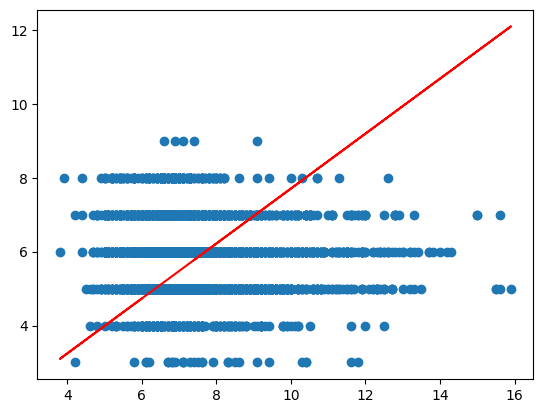

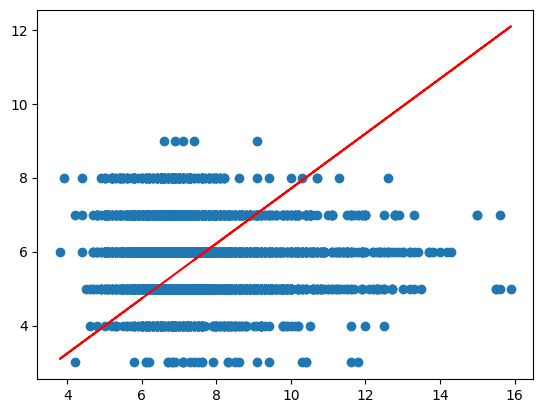

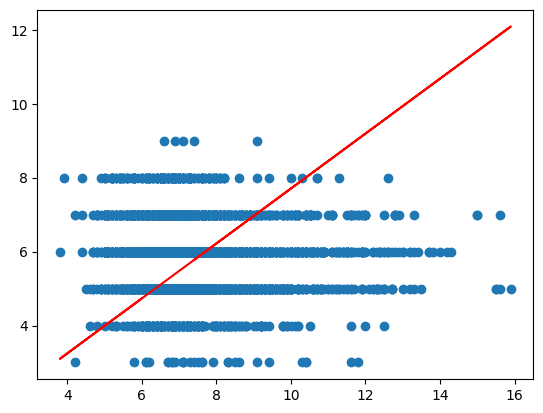

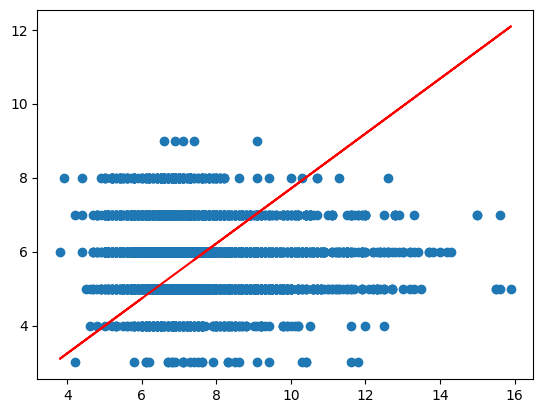

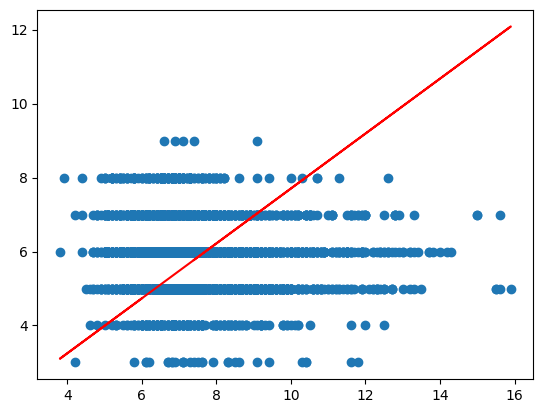

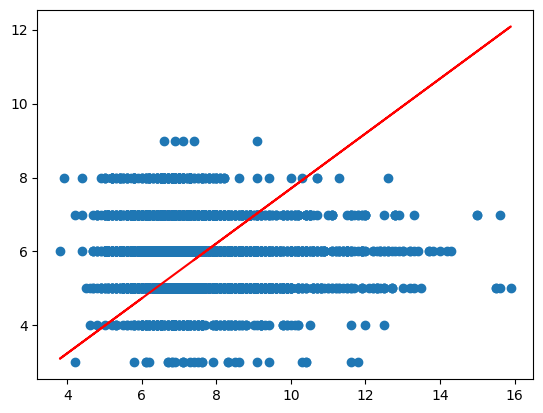

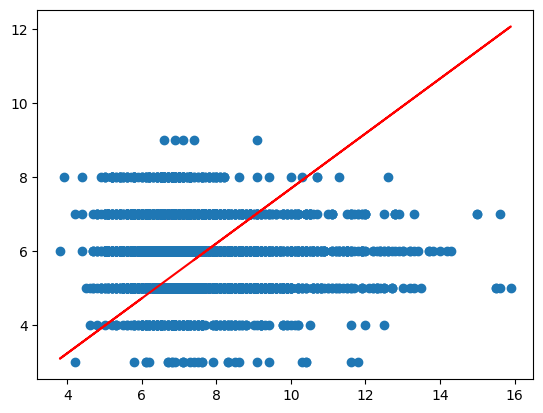

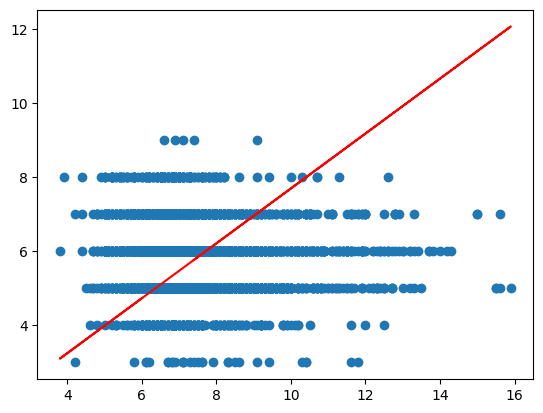

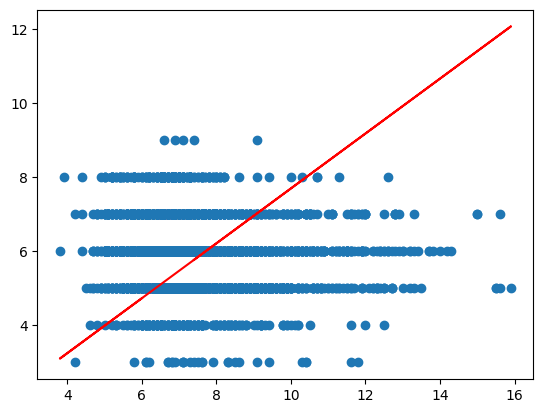

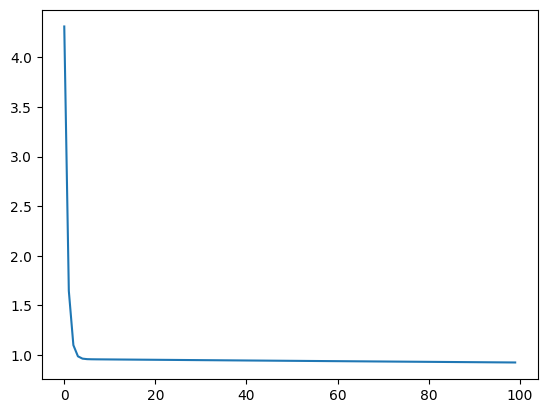

[0.2871270701157194, 0.7414648640500119]

In [ ]:
alpha=0.01
epochs=100
training(x_feature,y_feature,alpha,epochs)